# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
array_of_prices = np.array(prices)

# TODO: Minimum price of the data
minimum_price = np.min(array_of_prices)

# TODO: Maximum price of the data
maximum_price = np.max(array_of_prices)

# TODO: Mean price of the data
mean_price = np.mean(array_of_prices)

# TODO: Median price of the data
median_price = np.median(array_of_prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(array_of_prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: ** 
Increase in RM will result in increase of MEDV. 

Reason:
If there are more rooms in a house then it's price will be higher than the house with less number of rooms. If there are more houses with more number of rooms, then it pushes the average prices of houses in the neighbourhoood.

Increase in LSTAT will result in decrease of MEDV. 

Reason:
If there are more number of people from poor working class background, the probablity of them buying expensive houses is less. This results in decrease of demand for expensive houses. Less demand will drive the housing prices down.

Increase in PTRATIO will result in increase of MEDV. 

Reason:
PTRATIO will increase if the number of students increases and/or the number of teachers decreases. Increase in number of students means more families who want to live in the neighbourhood which implicitly means more demand for houses. So an increase in housing prices.

PTRATIO will increase if the number of teachers decreases. If those teachers who do not work decide to move out of the neighbourhood, then it means more number of houses are available. That is the supply will increase. This would mean low housing prices.

But because the number of students is usually a high number compared to number of teachers *and* we have to assume that non-working teachers will move out of neighbourhood *and* for some reason the school will increase the number of students per teacher, I tend to go with the former argument. 

Increase in PTRATIO will result in increase of MEDV.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [3]:
# Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    #Calculate the performance score between 'y_true' and 'y_predict'    
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:** Yes, this model has successfully captured the variation of the target variable. Two reasons for this:
First : The actual values include both positive and negative numbers, thus providing more variety in the test set.
Second : An R2 score of 0.923 is closer to 1.0 than 0.0. It means the model makes right predictions more than 92% of the time.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
# Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2,random_state=30)

print X_train
# Success
print "Training and testing split was successful."

        RM  LSTAT  PTRATIO
183  6.556   4.56     15.2
413  6.348  17.64     20.2
38   5.966  10.13     19.2
453  6.167  16.29     20.2
27   6.047  17.28     21.0
87   6.121   8.44     18.5
344  5.936   5.57     22.0
53   5.998   8.43     16.8
394  6.657  21.22     20.2
162  6.101   9.81     14.7
437  6.728  18.71     20.2
213  6.951   9.71     17.4
35   5.933   9.68     19.2
188  6.800   5.03     15.6
47   6.030  18.80     17.9
442  6.081  14.70     20.2
380  5.747  19.92     20.2
70   6.417   6.72     19.2
164  6.319  11.10     14.7
167  5.880  12.03     14.7
142  5.403  26.82     14.7
302  6.266   7.90     18.4
124  5.879  17.58     19.1
366  5.520  24.56     20.2
10   6.377  20.45     15.2
455  6.437  14.36     20.2
154  6.129  15.12     14.7
351  5.362  10.19     20.2
422  5.627  22.88     20.2
201  6.064  14.66     18.6
..     ...    ...      ...
46   5.786  14.15     17.9
283  6.009  10.40     16.0
62   6.456   6.73     19.7
390  5.608  12.13     20.2
400  5.304  26.64     20.2
4

### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: ** If we do not test the model, then there is a possibility of over fine-tuning (complicating) the algorithm for the existing data set. This process is called overfitting. 
Such a model might work very well on an existing data set, but it may perform very poorly while predicting values on new data set. 

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

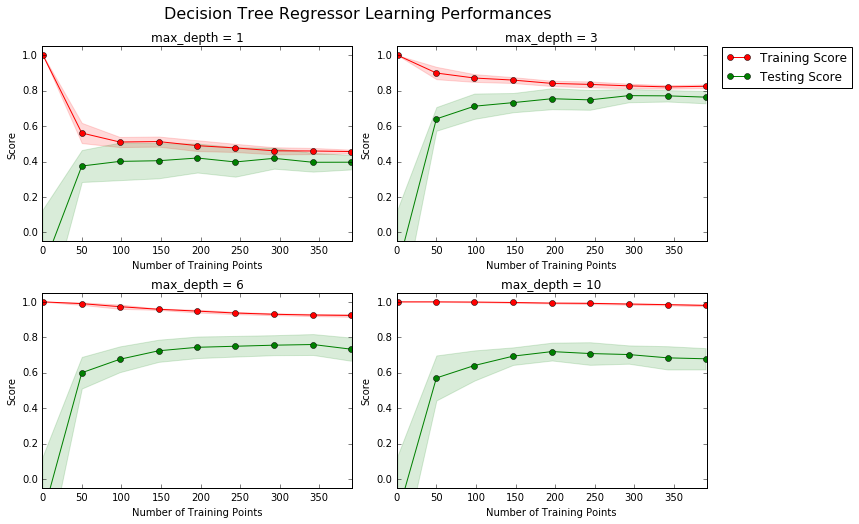

In [7]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: ** 
Maximum depth for the model with max_depth set to 1 is slightly above 0.4. So maximum depth is 0.45 or 0.5 (including the uncertainity). 
As more training points are added, the training curve goes low and eventually plateaus.
As more training points are added, the testing curve goes high and eventually plateaus.
From the above figures we can see that as more and more training points are added, the gap between the training curve and testing curve is becoming consistent. A good performing model will have a  low and a consistent gap between these two curves.

Having more training points will not benefit this model. 
Why ?
Since we have already seen that the training and testing curves have converged and collecting more data points can be more expensive with very little gain in terms of performance.


### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

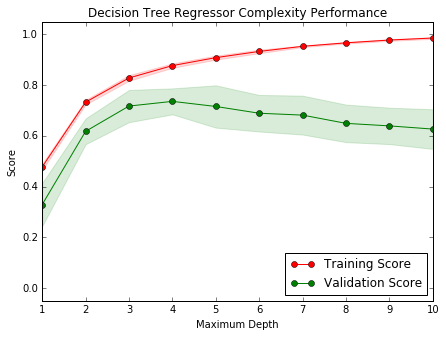

In [8]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: ** 
At max depth of 1, the model suffers from high bias. From the graph it is visible that the gap between training and validation curves is too low and their scores are low.

At max depth of 10, the model suffers from high variance. From the graph it is visible that the gap between training and validation scores is high (and score is high for training score but low for validation score). 

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: ** 
An ideal learning curve is the one where the gap between training and testing errors is small and the gap is consistent. For max_depth = 3, we can see that the training and testing curves start with high variance, but they both will almost converge when the number of training points is 300 and for higher training points, the two curves plateau thus maintaining a consistent gap between them. 

From the Complexity performance graph we see that at depth 3, the training score and validation score are not really far.

So max_depth set to 3 is the best model to generalize unseen data.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: ** Grid Search is a technique where one of the inbuilt modules of scikit will combine, execute and evaluate every possible combination which the user passes to it and then retains the best combination.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **
We divide the existing data sets for two purposes, one for training and one for testing. 

In k-fold Cross Validation, the dataset will be divided into k folds or k segments. In one iteration, one of the k folds will become a testing set, and the remaining k-1 folds will be the training sets. There will be k such iterations with each iteration picking a new testing set. 

Average of all the iterations will give the model performance. This process is called k-fold validation.

Why this process ?
If a data is distributed in a specific way, then statically dividing a dataset into training and testing data will probably result in a skewed model. This is because the training may have been performed on a specific set of data values whose behaviour could be totatally different from the data set in the testing set. k-fold validation technique will help us overcome this problem. 

If data is simply shuffled and training and testing is performed only once on that set, then a possibility of noise may result in a skewed model. K-fold will help us overcome this problem too. 


### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_iter'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [9]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit

def fit_model(features, prices):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(features.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': [1,2,3,4,5,6,7,8,9,10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(features, prices)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [10]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **
Optimal model have a max depth of 4. I had thought max depth of 3 is optimal. May be at after depth 5, variance gets higher and higher, may be thats the reason, but I am not sure on this. 

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [11]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $409,752.00
Predicted selling price for Client 2's home: $220,886.84
Predicted selling price for Client 3's home: $937,650.00


**Answer: ** 

For Client 1 -- It appears like the price of 415k for is reasonable. 
No Of Rooms in this House - 5 (around average)
Mean prices of all houses is ~450k, and 
close to 1/5th of population belong to low income group, this means less demand, so price just below avg sounds reasonable.

For Client 2 -- This amount seems to be too low.
Standard deviation of prices is ~160k and mean is at 450k.
This is a average sized house (4 rooms). 
Lowest price of the house is 105k.
Considering the mean and std deviation values, a price of 170k is too low and close to 105k, though 1/3rd of the population belong to low income group.
I would price the house around 250-300k.

For Client 3 -- This price of ~880k sounds reasonable.
Standard deviation of prices is ~160k and mean is at 450k.
Highest price of any house is ~1million.
So mean + std deviation comes to a value around 600k+, though the amount of 880k can be seen as too high there are two other positives to keep the price of this house high:
Its a fairly big house (8 rooms).
Very low 'low-income-earning' people.

Though I do not have full data to back that 880k is the right amount, I believe it could be one of the 'outlier value', which is not very uncommon.


### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [12]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

The constructed model should not be used in the real-world. Below are some of the reasons I think it should not be used.
(I have divided the answer into different segments for easy to read purpose)

**How relevant today is data that was collected from 1978?**

    At the beginning of this project, it is clearly mentioned that the prices are adjusted for 35-year inflation. Though the inflation-adjustment makes up from the price perspective, I do not think the data is fully relevant today.

    One of the parameters, teachers to students ratio (PTRATIO) would probably be very different today. For eg, quality of schools may have greatly changed impacting the student count and thus the demand for houses.* 

    There may be new houses constucted, thus increasing the supply of houses.*

**Are the features present in the data sufficient to describe a home?**

    People's preferences may have changed. For eg, people may greatly prefer 2-3 bedroom houses over >4 bedroom houses. This creates more demand for these houses than >4 bedroom houses. So a more fine-tuned model may be required for <4 and >4 bedroom houses. Also people may prefer few modern amenities in their houses which would obviously push the housing prices high.

**Is the model robust enough to make consistent predictions?**
The model is not robust enough for the following reasons.

    Economic conditions of families living there may have greatly improved or may have gone bad, this too shall have an impact on our model. 
    
    From 1978 till now, there could be a large influx or egress of people, thus impacting the housing prices.

**Would data collected in an urban city like Boston be applicable in a rural city?**
    
    No, in rural city, the availability of land is more so the real estate is cheaper. In urban cities, convenience and land availability is very critical. 
    
    There could be income disparity between urban and rural population, this too shall impact the pricing of houses.
    
Finally, the range of 69k$ is too high to precisely value the price of the home. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.